### Import libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
from itertools import combinations
import re 
from matplotlib.dates import DateFormatter

### Load the data

In [3]:
# Load data
path = '../paises_europa/tabela_paises.csv'
df = pd.read_csv(path)

### Describe Dataset

In [6]:
# load describe data
df.describe()

,Alemanha,Estonia,Finlandia,Grecia,Suecia
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,4.581250,8.170833,3.506250,3.206250,4.331250
std,3.575249,8.471277,2.979462,4.448543,3.368765
min,-0.700000,-1.800000,-0.300000,-2.400000,-0.200000
25%,1.600000,0.975000,0.975000,-0.950000,1.725000
50%,4.200000,5.000000,2.600000,2.850000,3.500000
75%,7.650000,15.000000,5.925000,6.350000,6.900000
max,11.600000,25.200000,9.100000,12.100000,10.800000


### Function Comparetive monthly x monthly

In [8]:
# Function to get the number of months to be displayed
def get_number_of_months():    
    while True:
        try:
            select_number_monthly = int(input('Digite o número de meses a serem exibidos (1 a 48): '))
            if 1 <= select_number_monthly <= 48:
                return select_number_monthly
            else:
                print('Número inválido. Digite um número entre 1 e 48.')
        except ValueError:
            print('Erro: Digite um número válido.')


# Function to compare monthly values ​​of countries in Europe
def compare_monthly(df, select_number_monthly):
    counter_europe = df.columns[1:].tolist() # list of countries
    comparison_monthly = [] # empty list to store

# Remove special characters
    df['Mes/Ano'] = df['Mes/Ano'].apply(lambda x: re.match(r'([A-Za-z]+/\d{4})', x).group(1) if re.match(r'([A-Za-z]+/\d{4})', x) else x)
    
    for _, row in df.iterrows():
        
        monthly_year = str(row['Mes/Ano']).strip() #  Ensures it is a clean string
        comparison = [] # empty list to store
        
        #Compare the values ​​of each country in Europe
        
        for country_1, country_2 in combinations(counter_europe, 2):
            value_1 = row[country_1]
            value_2 = row[country_2]
            
            # Check if the values ​​are numbers and if they are valid
            
            if value_1 > value_2:
                msg = f'{country_1} {value_1} > {country_2} {value_2}'
            elif value_2 > value_1:
                msg = f'{country_2} {value_2} > {country_1} {value_1}'
            else:
                msg = f'{country_1} = {country_2} {value_1}'
            
            #Add the message to the comparison list for the current month
            
            comparison.append(msg)
        
        comparison_monthly.append({
            'Mes/Ano': monthly_year,
            'Comparacao': comparison
        })
    return comparison_monthly[:select_number_monthly]


        

### Print the result


In [9]:
num_moths =get_number_of_months()
# Print the comparison results
for monthly in compare_monthly(df, num_moths):
    print(f'\n--- {monthly['Mes/Ano']}  ---')
    for compar in monthly['Comparacao']:
        print(compar)


--- Jan/2020  ---
Alemanha = Estonia 1.6
Alemanha 1.6 > Finlandia 1.2
Alemanha 1.6 > Grecia 1.1
Alemanha 1.6 > Suecia 1.5
Estonia 1.6 > Finlandia 1.2
Estonia 1.6 > Grecia 1.1
Estonia 1.6 > Suecia 1.5
Finlandia 1.2 > Grecia 1.1
Suecia 1.5 > Finlandia 1.2
Suecia 1.5 > Grecia 1.1

--- Fev/2020  ---
Estonia 2.0 > Alemanha 1.7
Alemanha 1.7 > Finlandia 1.1
Alemanha 1.7 > Grecia 0.4
Alemanha 1.7 > Suecia 1.3
Estonia 2.0 > Finlandia 1.1
Estonia 2.0 > Grecia 0.4
Estonia 2.0 > Suecia 1.3
Finlandia 1.1 > Grecia 0.4
Suecia 1.3 > Finlandia 1.1
Suecia 1.3 > Grecia 0.4

--- Mar/2020  ---
Alemanha 1.3 > Estonia 1.0
Alemanha 1.3 > Finlandia 0.9
Alemanha 1.3 > Grecia 0.2
Alemanha 1.3 > Suecia 0.8
Estonia 1.0 > Finlandia 0.9
Estonia 1.0 > Grecia 0.2
Estonia 1.0 > Suecia 0.8
Finlandia 0.9 > Grecia 0.2
Finlandia 0.9 > Suecia 0.8
Suecia 0.8 > Grecia 0.2

--- Abr/2020  ---
Alemanha 0.8 > Estonia -0.9
Alemanha 0.8 > Finlandia -0.3
Alemanha 0.8 > Grecia -0.9
Alemanha 0.8 > Suecia -0.2
Finlandia -0.3 > Estonia

### Generation Grafiques Monthly

In [ ]:
def compare_and_monthly():
    counter_europe = df.columns[:1].tolist() # list of countries
    comparison_monthly = [] # empty list to store

# Remove special characters
    df['Mes/Ano'] = df['Mes/Ano'].apply(lambda x: re.match(r'([A-Za-z]+/\d{4})', x).group(1) if re.match(r'([A-Za-z]+/\d{4})', x) else x)
    
    for _, row in df.iterrows():
        
        monthly_year = str(row['Mes/Ano']).strip() #  Ensures it is a clean string
        comparison = [] # empty list to store
        
        #Compare the values ​​of each country in Europe
        
        for country_1, country_2 in combinations(counter_europe, 2):
            value_1 = row[country_1]
            value_2 = row[country_2]
            
            # Check if the values ​​are numbers and if they are valid
            
            if value_1 > value_2:
                msg = f'{country_1} {value_1} > {country_2} {value_2}'
            elif value_2 > value_1:
                msg = f'{country_2} {value_2} > {country_1} {value_1}'
            else:
                msg = f'{country_1} = {country_2} {value_1}'
            
            #Add the message to the comparison list for the current month
            
            comparison.append(msg)
        
        comparison_monthly.append({
            'Mes/Ano': monthly_year,
            'Comparacao': comparison
        })
    return comparison_monthly[:48]
def compare_and_plot_monthly():
    
    plot_df = df.copy()
    plot_df['Mes/Ano'] = pd.to_datetime(plot_df['Mes/Ano'], errors='coerce')
    plot_df.sort_values('Mes/Ano').reset_index(drop=True)
    
    comparisons = compare_and_monthly()
    
    if comparisons is None:
        print("Nenhum dado foi carregado. Saindo...")
        return

    while True:
        print('\nOpções de Visualização: '
            '\n1 - Evolução Temporal por País'
            '\n2 - Comparativo entre 2 Países'
            '\n3 - Sair')
        
        try:
            option = int(input('Digite a opção desejada (1 a 3): '))
        except ValueError:
            print('Erro: Digite um número válido!')
            continue
        
        if option == 1:
            countries = input('Digite países separados por vírgula (ex: Alemanha, França):').split(',')
            
            plt.figure(figsize=(12, 6))
            
            for country in countries:
                country = country.strip()
                if country in plot_df.columns:
                    plt.plot(plot_df['Mes/Ano'].iloc[:len(comparisons)], 
                            plot_df[country].iloc[:len(comparisons)],
                            label=country, marker='o')

            plt.gca().xaxis.set_major_formatter(DateFormatter('%m/%Y'))
            plt.title('Evolução Temporal por País')
            plt.xlabel('Mês/Ano')
            plt.ylabel('Valor')
            plt.legend()
            plt.grid(True)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

        elif option == 2:
            country1, country2 = map(str.strip, input("Digite 2 países separados por vírgula: ").split(','))

            if country1 not in plot_df.columns or country2 not in plot_df.columns:
                print("Erro: Um ou ambos os países digitados não estão no conjunto de dados.")
                continue
                        
            data = plot_df[['Mes/Ano', country1, country2]].dropna()
            data = data.set_index('Mes/Ano').sort_index()

            ax = data.plot(kind='bar', figsize=(12, 6))

            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}',  
                            (p.get_x() + p.get_width() / 2, p.get_height()),  
                            ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

            plt.xticks(range(len(data.index)), data.index.strftime('%b/%Y'), rotation=45)
            plt.title(f'Comparativo entre {country1} e {country2}')
            plt.xlabel('Mês/Ano')
            plt.ylabel('Valor')
            plt.tight_layout()
            plt.show()

        elif option == 3:
            print("Saindo do programa...")
            break
        
        else:
            print('Opção inválida. Tente novamente.')
            

### Requisition Graph

/tmp/ipykernel_47041/3751632240.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plot_df['Mes/Ano'] = pd.to_datetime(plot_df['Mes/Ano'], errors='coerce')



Opções de Visualização: 
1 - Evolução Temporal por País
2 - Comparativo entre 2 Países
3 - Sair


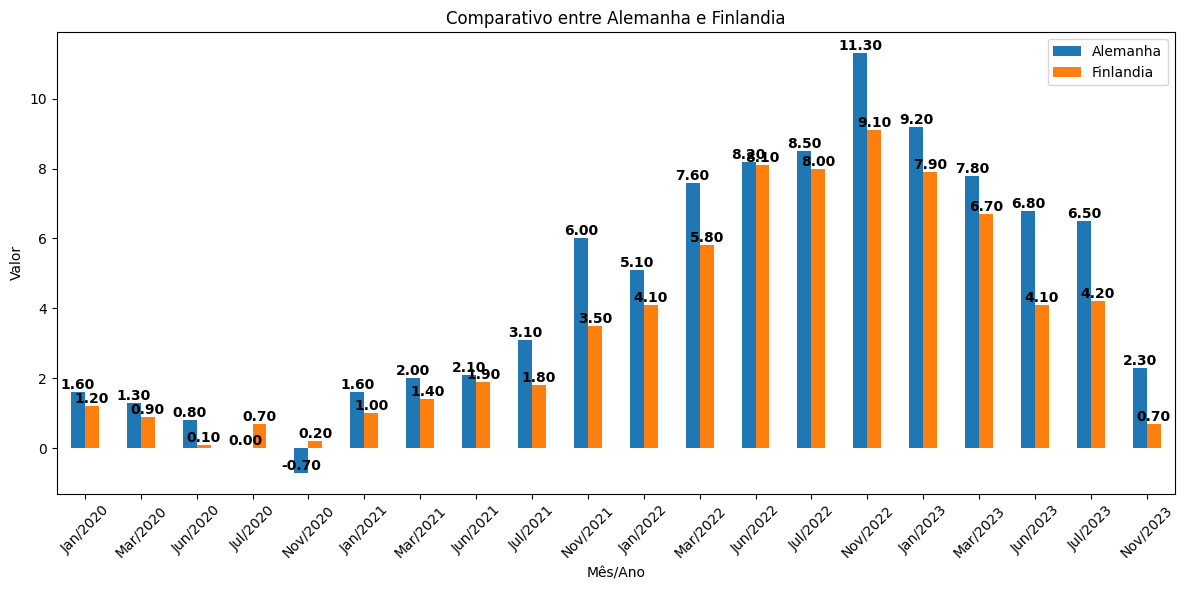


Opções de Visualização: 
1 - Evolução Temporal por País
2 - Comparativo entre 2 Países
3 - Sair
Saindo do programa...


In [36]:
compare_and_plot_monthly()